## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [1]:
! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 25 (delta 4), reused 3 (delta 3), pack-reused 18
Receiving objects: 100% (25/25), 5.04 MiB | 27.18 MiB/s, done.
Resolving deltas: 100% (4/4), done.


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#1.1
df = pd.read_csv('/content/kmc/data/airbnb_hw.csv')
#print(df.columns)
df['price'] = df['Price']
df['beds'] = df['Beds']
df['reviews'] = df['Number Of Reviews']
df['rating'] = df['Review Scores Rating']
df = df.loc[:,['price', 'beds', 'reviews','rating']]

print(df.shape)
df.describe ()

(30478, 4)


,beds,reviews,rating
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [24]:
#1.2
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df.describe()

,price,beds,reviews,rating
count,30478.000000,30393.000000,30478.000000,22155.000000
mean,163.589737,1.530089,12.018735,91.993230
std,197.785454,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [25]:
#1.2 cont
df['beds'] = df['beds'].fillna(1)
df.describe()

,price,beds,reviews,rating
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [30]:
#1.2 cont
pd.crosstab(df['rating'].isnull(), df['reviews']>0)

reviews,False,True
rating,,
False,0,22155
True,7814,509


In [31]:
df = df.dropna()
df.describe()

,price,beds,reviews,rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [33]:
#2
def maxmin(x):
  value = (x-min(x))/(max(x)-min(x))
  return value

new = df.drop('price', axis=1)
new = new.apply(maxmin)

In [39]:
#3
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(new)
new['cluster'] = model.labels_

new.describe()

,beds,reviews,rating,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,1.414218
std,0.065205,0.094954,0.110630,1.528900
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,0.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


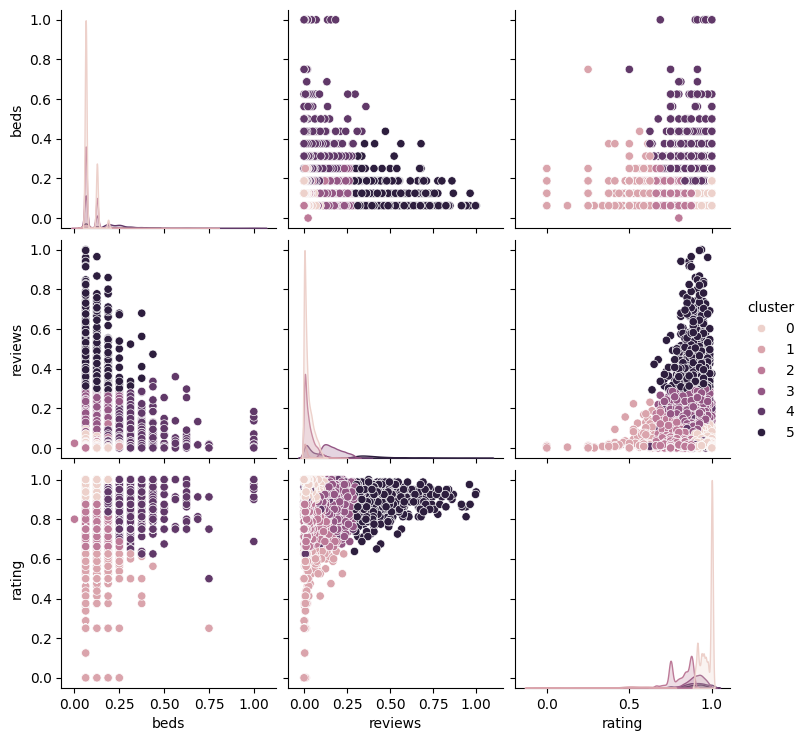

In [40]:
#4
sns.pairplot(data=new, hue='cluster')

In [41]:
#5
df['cluster'] = model.labels_
df.loc[:, ['price', 'cluster']].groupby('cluster').describe()

price                                                              
           count        mean         std   min     25%    50%     75%      max
cluster                                                                       
0        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
1          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0
4         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
5          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0

Q5
Clusters 4 and 0 have the highestrate per night out of the table. Cluster 4 remainst he highest across every percentile, indicating that high end outliers are not biasing the results. Cluster 0 seems to get pricier than the rest at the 75th percentile.

<Axes: >

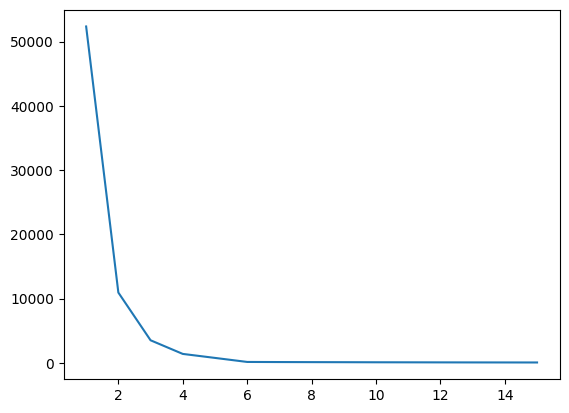

In [43]:
k_bar = 15
k_grid = np.arange(1, k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KMeans(n_clusters = k+1, max_iter = 300, n_init = 10, random_state=0)
  model = model.fit(new)
  SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE)

price                                                            
           count        mean         std   min    25%    50%    75%      max
cluster                                                                     
0        11144.0  151.175879  152.020178  10.0   85.0  128.0  190.0  10000.0
1         8584.0  135.089352   96.618627  20.0   80.0  119.0  170.0   5000.0
2         2427.0  241.042027  232.898539  27.0  115.0  180.0  299.0   4500.0

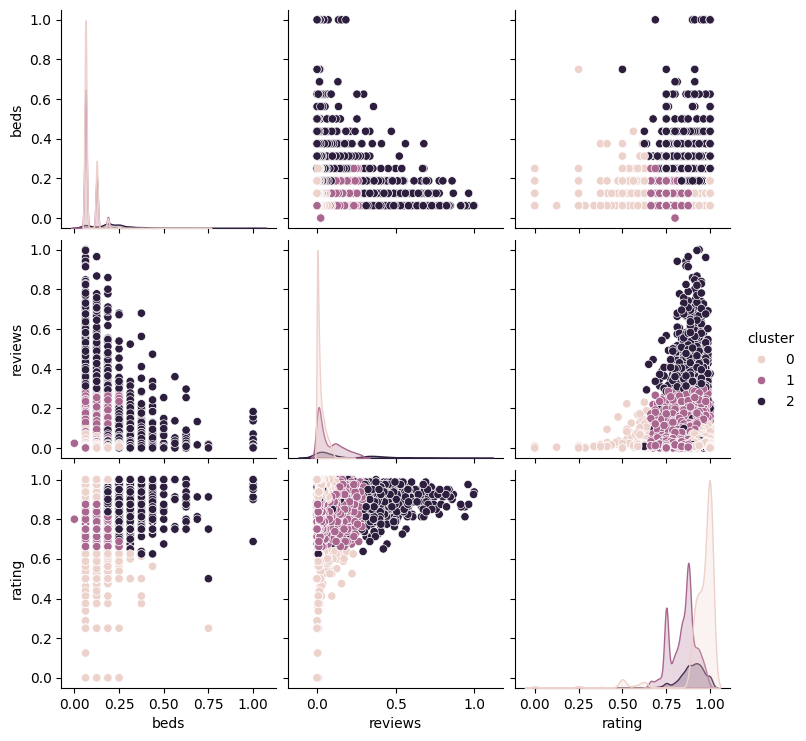

In [45]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model = model.fit(new)
new['cluster'] = model.labels_

sns.pairplot(data=new,hue='cluster')

df['cluster'] = model.labels_
df.loc[:,['price','cluster'] ].groupby('cluster').describe()

Q6 Cluster 2 has the highest prices by a margin, which is surprising given that it is not caused by outliers. Cluster 0 is the second highest, but still much lower than cluster 2.

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [46]:
#1
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

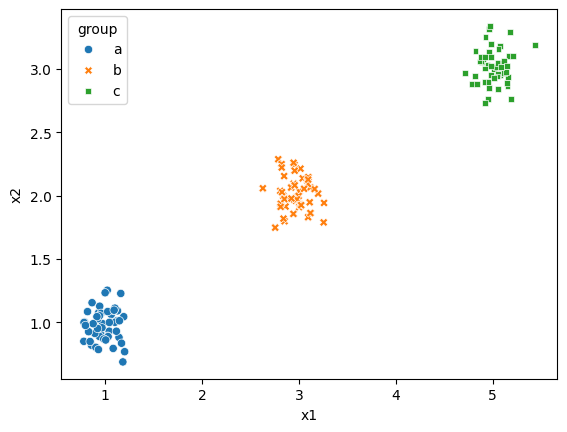

In [47]:
#2
sns.scatterplot(data = df0_125, x ='x1', y='x2',hue ='group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

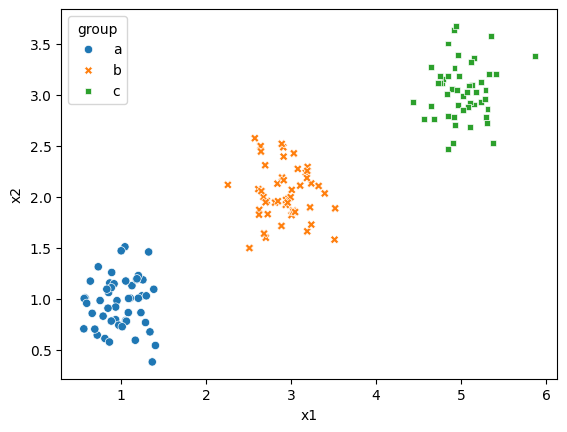

In [48]:
#2.1
sns.scatterplot(data = df0_25, x ='x1', y='x2',hue ='group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

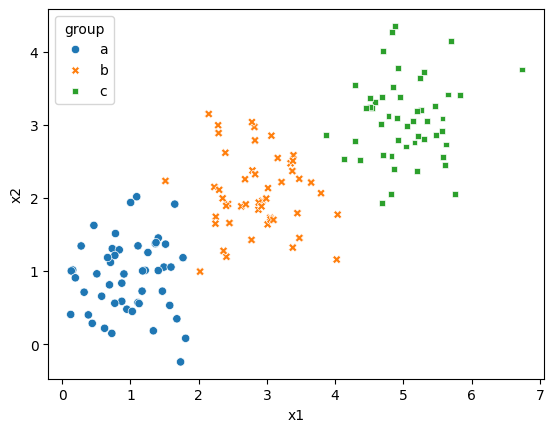

In [49]:
#2.2
sns.scatterplot(data = df0_5, x ='x1', y='x2',hue ='group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

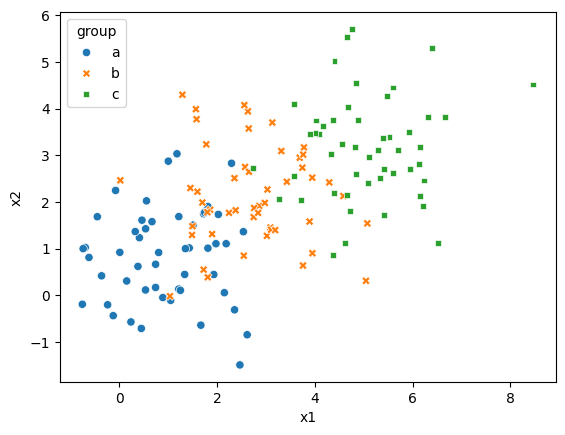

In [50]:
#2.3
sns.scatterplot(data = df1_0, x ='x1', y='x2',hue ='group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

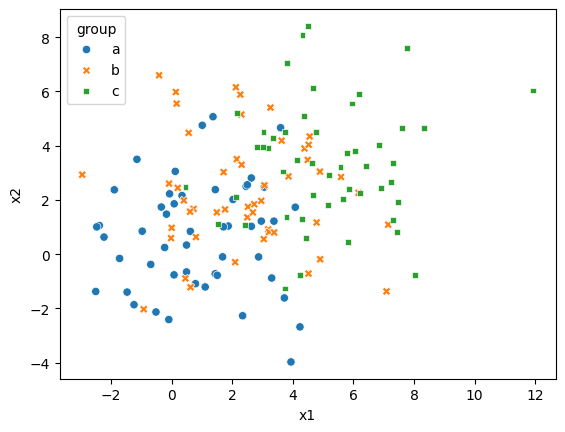

In [51]:
#2.4
sns.scatterplot(data = df2_0, x ='x1', y='x2',hue ='group', style = 'group')

Q2 As the noise increased, the clusters spread out until they each were touching. Without prior grqaphs, it would be at .5 that the points would be harder to tell apart if each point looked the same. After that, the clusters end up indistiguishable from each other.

In [52]:
#3
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

In [53]:
#3.1
def scree(data):
    X = data.loc[ : , ['x1','x2'] ]
    X = X.apply(maxmin)
    k_bar = 15
    k_grid = np.arange(1,k_bar+1)
    SSE = np.zeros(k_bar)
    for k in range(k_bar):
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
        model = model.fit(X)
        SSE[k] = model.inertia_
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
    axes.set_ylim(0, 35)

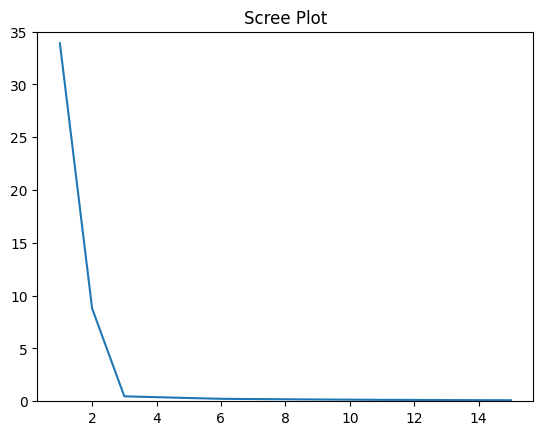

In [54]:
scree(df0_125)

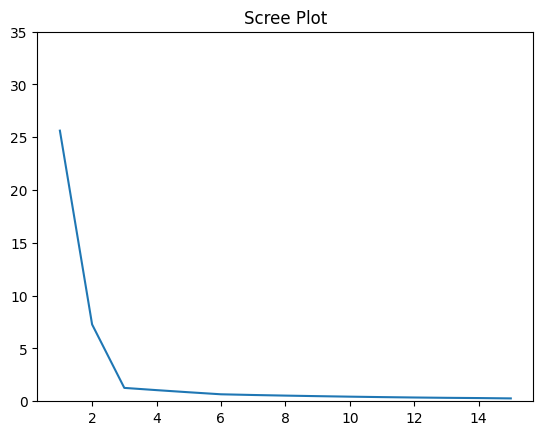

In [56]:
scree(df0_25)

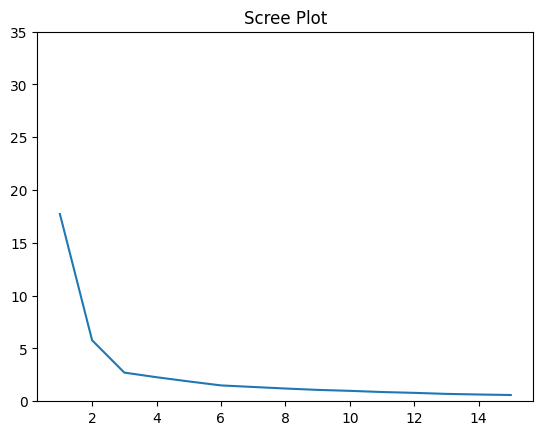

In [55]:
scree(df0_5)

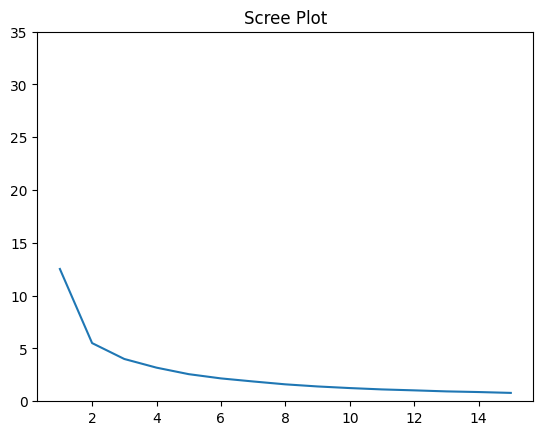

In [57]:
scree(df1_0)

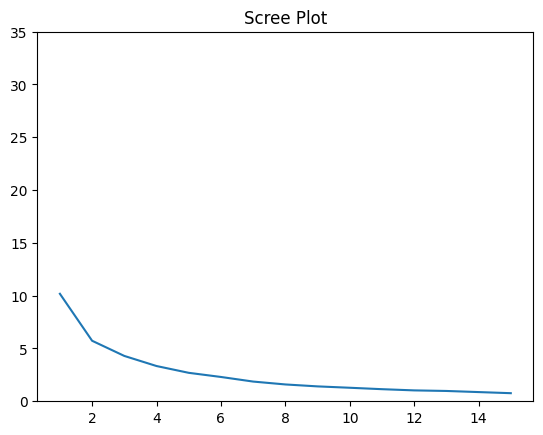

In [58]:
scree(df2_0)

Q3 As the noise increased, it became harder to identify the elbow as it became less and less clear. By 2 the elbow became barely observable.

Q4
With distinct groups, an additional cluster is actually useful for observing any changes in SSE. With less distinct groups, this is less useful since we cannot tell which points beling to which clsuters. Hence, the use of the scree plot method is better with these distinct groups and will actually show an elbow.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?